In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import pathlib
data_dir =pathlib.Path("dataset")

In [3]:
data_dir

WindowsPath('dataset')

In [4]:
retina_images_dict = {
    'mild' : list(data_dir.glob('Mild/*')),
    'moderate' : list(data_dir.glob('Moderate/*')),
    'no_dr' : list(data_dir.glob('No_DR/*')),
    'proliferate_dr' : list(data_dir.glob('Proliferate_DR/*')),
    'severe' : list(data_dir.glob('Severe/*')),
}

In [5]:
retina_images_dict['mild']

[WindowsPath('dataset/Mild/10030_left.png'),
 WindowsPath('dataset/Mild/10030_right.png'),
 WindowsPath('dataset/Mild/10085_left.png'),
 WindowsPath('dataset/Mild/10085_right.png'),
 WindowsPath('dataset/Mild/10150_right.png'),
 WindowsPath('dataset/Mild/10169_right.png'),
 WindowsPath('dataset/Mild/10177_left.png'),
 WindowsPath('dataset/Mild/10177_right.png'),
 WindowsPath('dataset/Mild/1020_left.png'),
 WindowsPath('dataset/Mild/1020_right.png'),
 WindowsPath('dataset/Mild/10220_left.png'),
 WindowsPath('dataset/Mild/10221_right.png'),
 WindowsPath('dataset/Mild/10232_right.png'),
 WindowsPath('dataset/Mild/10233_left.png'),
 WindowsPath('dataset/Mild/10233_right.png'),
 WindowsPath('dataset/Mild/10234_left.png'),
 WindowsPath('dataset/Mild/10234_right.png'),
 WindowsPath('dataset/Mild/10269_left.png'),
 WindowsPath('dataset/Mild/1027_left.png'),
 WindowsPath('dataset/Mild/10297_right.png'),
 WindowsPath('dataset/Mild/10320_right.png'),
 WindowsPath('dataset/Mild/10334_left.png'),
 

In [6]:
retina_labels_dict = {
    'mild' : 0,
    'moderate' : 1,
    'no_dr' : 2,
    'proliferate_dr' : 3,
    'severe' : 4
}

In [7]:
x, y = [], []
for disease_level, images in retina_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        x.append(img)
        y.append(retina_labels_dict[disease_level])

C:\python-3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

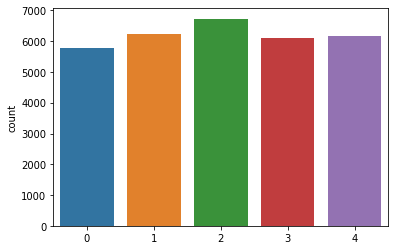

In [8]:
sns.countplot(y)

In [9]:
print(pd.DataFrame(y).value_counts())

2    6732
1    6237
4    6185
3    6102
0    5785
dtype: int64


In [10]:
x = np.array(x)
y = np.array(y)

In [11]:
x.shape

(31041, 224, 224, 3)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
len(xtrain)

24832

In [14]:
len(xtest)

6209

In [15]:
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size=0.5, random_state=0)

In [16]:
len(xtest)

3105

In [17]:
len(xval)

3104

In [18]:
img_size = 256
b_size = 32
channels = 3
epoch = 20

In [19]:
#scaling
resize_rescale = tf.keras.Sequential([
    #all the image have the same size then why to use??
    #when user input new image of different size then useful
    layers.experimental.preprocessing.Resizing(img_size, img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [20]:
i_shape = (b_size, img_size, img_size, channels)

model = models.Sequential([
    resize_rescale,
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),  activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(), 
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(5, activation='softmax')
])
model.build(i_shape)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [22]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [24]:
history = model.fit(xtrain, ytrain, 
          epochs= epoch, batch_size = b_size,
         verbose=1, validation_data=(xval, yval))

Epoch 1/20
776/776 [==============================] - 1524s 2s/step - loss: 1.2860 - accuracy: 0.3826 - val_loss: 1.2389 - val_accuracy: 0.4072
Epoch 2/20
776/776 [==============================] - 1820s 2s/step - loss: 1.2161 - accuracy: 0.4071 - val_loss: 1.2300 - val_accuracy: 0.4117
Epoch 3/20
776/776 [==============================] - 1810s 2s/step - loss: 1.2075 - accuracy: 0.4141 - val_loss: 1.2241 - val_accuracy: 0.4146
Epoch 4/20
776/776 [==============================] - 1365s 2s/step - loss: 1.1983 - accuracy: 0.4200 - val_loss: 1.2157 - val_accuracy: 0.4198
Epoch 5/20
776/776 [==============================] - 1082s 1s/step - loss: 1.1930 - accuracy: 0.4215 - val_loss: 1.2298 - val_accuracy: 0.4014
Epoch 6/20
776/776 [==============================] - 1061s 1s/step - loss: 1.1871 - accuracy: 0.4302 - val_loss: 1.2242 - val_accuracy: 0.4169
Epoch 7/20
776/776 [==============================] - 1046s 1s/step - loss: 1.1767 - accuracy: 0.4389 - val_loss: 1.2362 - val_accuracy:

98/98 - 65s - loss: 1.9624 - accuracy: 0.4200 - 65s/epoch - 661ms/step


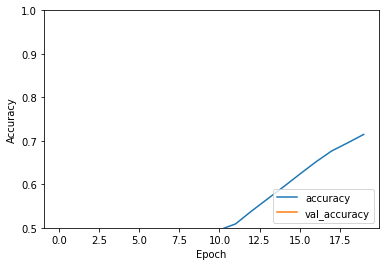

In [27]:
# Evaluate the performance of the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2)

In [28]:
# Confusion matrix
y_pred = model.predict(xtest)
y_pred = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(ytest, y_pred))

98/98 [==============================] - 64s 655ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.30      0.17      0.22       569
           1       0.38      0.58      0.46       637
           2       0.54      0.48      0.51       695
           3       0.43      0.41      0.42       600
           4       0.42      0.43      0.42       604

    accuracy                           0.42      3105
   macro avg       0.41      0.41      0.41      3105
weighted avg       0.42      0.42      0.41      3105

